### 0. Setup

In [1]:
%matplotlib inline

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


In [3]:
root = 'D:/bme/'
logs_dir = 'test_data2/'
meta_fn = 'test_metadata/03-26-testing.csv'

In [4]:
# Replace spaces with ','

def replace_in_file(file_path, out_file_path):
    with open(file_path, 'r') as file:
        filedata = file.read()
        modified_data = filedata.replace(' ', ',')

    with open(out_file_path, 'w') as file:
        file.write(modified_data)

for filename in os.listdir(root + logs_dir):
    if filename.endswith(".txt"): 
        file_path = os.path.join(root + logs_dir, filename)
        replace_in_file(file_path, os.path.join(root + logs_dir, filename))

In [5]:
# Load into pandas

logs_df = pd.DataFrame()
for filename in os.listdir(root + logs_dir):
    if filename.endswith(".txt"): 
        file_path = os.path.join(root + logs_dir, filename)
        
        current_df = pd.read_csv(file_path, skiprows=1, header=None, names=['t', 'a', 'b', 'c', 'd', 'e', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9', 'b10'])
        current_df['date'] = filename[:-4]
        
        logs_df = logs_df.append(current_df, ignore_index=True)
#logs_df['t'] = pd.to_numeric(logs_df['t'], errors='coerce')
#logs_df['x'] = pd.to_numeric(logs_df['x'], errors='coerce')
#logs_df['y'] = pd.to_numeric(logs_df['y'], errors='coerce')
#logs_df['d'] = pd.to_numeric(logs_df['d'], errors='coerce')

C:\Users\finno\AppData\Local\Temp\ipykernel_17536\500076608.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  logs_df = logs_df.append(current_df, ignore_index=True)
C:\Users\finno\AppData\Local\Temp\ipykernel_17536\500076608.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  logs_df = logs_df.append(current_df, ignore_index=True)
C:\Users\finno\AppData\Local\Temp\ipykernel_17536\500076608.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  logs_df = logs_df.append(current_df, ignore_index=True)
C:\Users\finno\AppData\Local\Temp\ipykernel_17536\500076608.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  logs_df = logs_df.append

In [6]:
# Process logs to left-justify

logs_df.replace('[', np.nan, inplace=True)
logs_df.replace(']', np.nan, inplace=True)
logs_df.replace('(', np.nan, inplace=True)
logs_df.replace(')', np.nan, inplace=True)

columns_to_align = ['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9', 'b10']

def custom_shift(row):
    values = row[columns_to_align].tolist()
    new_values = [np.nan] * len(values)  # Initialize with empty values
    
    for i in range(len(values)):
        if not pd.isna(values[i]):  # If the value is not NaN, shift it to the leftmost available position
            for j in range(len(new_values)):
                if pd.isna(new_values[j]):  # Find the first available position
                    new_values[j] = values[i]  # Move the value to this position
                    break  # Move to the next value in the original row
                    
    return pd.Series(new_values, index=columns_to_align)

logs_df[columns_to_align] = logs_df.apply(custom_shift, axis=1)

logs_df['b5'] = logs_df.b1.apply(lambda x: str(x)[1:] if ((str(x)[0]=='(') or (str(x)[0]=='[')) else x)
logs_df['b6'] = logs_df.b4.apply(lambda x: str(x)[:-1] if ((str(x)[-1]==']') or (str(x)[-1]==')')) else x)

logs_df.replace('[', np.nan, inplace=True)
logs_df.replace(']', np.nan, inplace=True)
logs_df.replace('(', np.nan, inplace=True)
logs_df.replace(')', np.nan, inplace=True)


In [7]:
logs_df['t'] = pd.to_numeric(logs_df['t'], errors='coerce')
#logs_df['x'] = pd.to_numeric(logs_df['x'], errors='coerce')
#logs_df['y'] = pd.to_numeric(logs_df['y'], errors='coerce')
logs_df['d'] = pd.to_numeric(logs_df['d'], errors='coerce')
logs_df['c'] = pd.to_numeric(logs_df['c'], errors='coerce')

In [8]:
# Load metadata .csv

meta_df = pd.read_csv(root + meta_fn)

In [9]:
'''
# Attempts to shift all failed
temp = logs_df[['date']]

temp['time'] = temp['date'].apply(lambda x : x[-6:]).astype(int)
temp['time'] = temp['time'] + 10000 + 1600
'''

"\n# Attempts to shift all failed\ntemp = logs_df[['date']]\n\ntemp['time'] = temp['date'].apply(lambda x : x[-6:]).astype(int)\ntemp['time'] = temp['time'] + 10000 + 1600\n"

In [10]:
# Initial assumption of mapping trialnames to trial numbers

mapping = {
    '1:26':'20240320_121016',
    '1:32':'20240320_121017',
    '1:35':'20240320_121019',
    '1:38':'20240320_121110',
    '1:40':'20240320_121144',
    '1:41':'20240320_121229',
    '1:42':'20240320_121234',
    '1:45':'20240320_121235',
    '1:47':'20240320_121302',
    '1:50':'20240320_121309',
    '1:53':'20240320_121321',
    '1:54':'20240320_121329',
    '1:56':'20240320_121453',
    '1:57':'20240320_121512',
    '1:59':'20240320_121549',
    '2:02':'20240320_121705',
    '2:04':'20240320_121723',
    '2:05':'20240320_121835',
    '2:07':'20240320_122003',
    '2:10':'test1',
    '2:11':'20240320_122113',
    '2:14':'test2',
    '2:18':'20240320_122035',
    '2:19':'20240320_122155',
    'b2.1':'20240320_121453',
    'b2.2':'20240320_121512',
    'b2.3':'20240320_121549',
    'b2.4':'20240320_121705',
    'b2.5':'20240320_121723',
    'b2.6':'20240320_121835',
    'b2.7':'20240320_122003',
    'b2.8':'20240320_122035',
    'b2.9':'20240320_122113',
    'b2.10':'20240320_122155'
}

meta_df['filename'] = meta_df['Start Time'].map(mapping) 

In [11]:
meta_df['v'] = 7.315 / meta_df['Duration (s) over 24ft (731.5cm)']

### 1. Simple Preprocessing

In [12]:
data_df = logs_df.copy()

In [13]:
'''
# Only keep longest sequence of b=0

m = np.concatenate(([True], data_df['b'] != 0, [True]))
ss = np.flatnonzero(m[1:] != m[:-1]).reshape(-1, 2)

filt_df = pd.DataFrame()
for trial, group in data_df.groupby('date'):
    s, e = ss[(ss[:, 1] - ss[:, 0]).argmax()]
    filt_df = filt_df.append(group.iloc[s:e])

'''

filt_df = data_df

In [14]:
batch1_trials = [
    '20240320_121017',
    '20240320_121019',
    '20240320_121144',
    '20240320_121302',
    '20240320_121309',
    '20240320_121321',
    '20240320_121512',
    '20240320_121549'
]

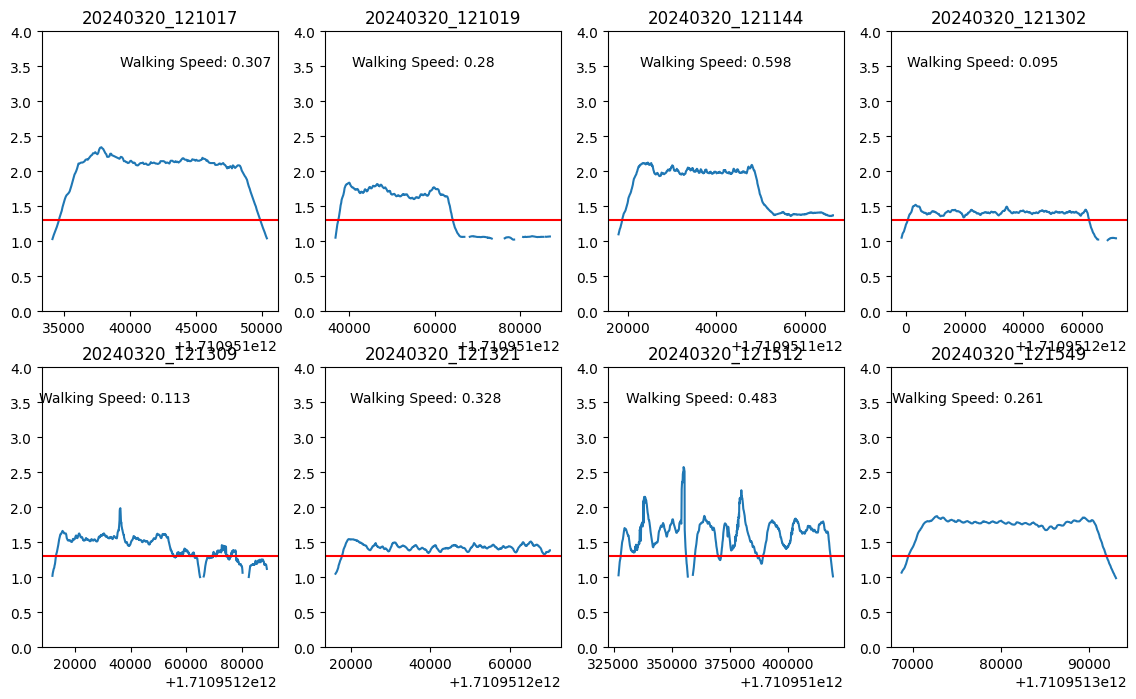

In [15]:

plt.figure(figsize=(14,8))

for i, d in enumerate(batch1_trials): #np.append(speed_trials, batch_two)
    plt.subplot(2, 4, i+1)
    df = filt_df[filt_df['date']==d]
    plt.plot(df['t'], df['c'])
    plt.axhline(y=0.8+0.5, color='red')
    plt.text(np.min(df['t']+10000), 3.5, f"Walking Speed: {np.round(np.array(meta_df['v'][meta_df['filename']==d].dropna())[0], 3)}")
    plt.ylim([0, 4])
    plt.title(d)
    #plt.show()

Text(0.5, 1.0, 'Brake Testing: Distance to Patient vs. Avg Walking Speed')

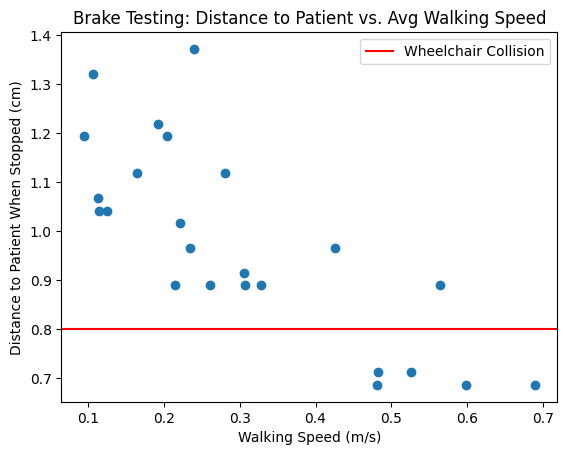

In [16]:
plt.scatter(meta_df['v'], meta_df['Stop dist (cm)']/100)
plt.xlabel('Walking Speed (m/s)')
plt.ylabel('Distance to Patient When Stopped (cm)')

plt.axhline(y=0.8, color='red', label='Wheelchair Collision')
plt.legend()

plt.title('Brake Testing: Distance to Patient vs. Avg Walking Speed')

### 2. Batch Two

In [52]:
batch_two = [
    #'20240320_121453',
    '20240320_121512',
    '20240320_121549',
    '20240320_121705',
    '20240320_121723',
    #'20240320_121835',
    '20240320_122003',
    '20240320_122035',
    #'20240320_122113',
    '20240320_122155',
]

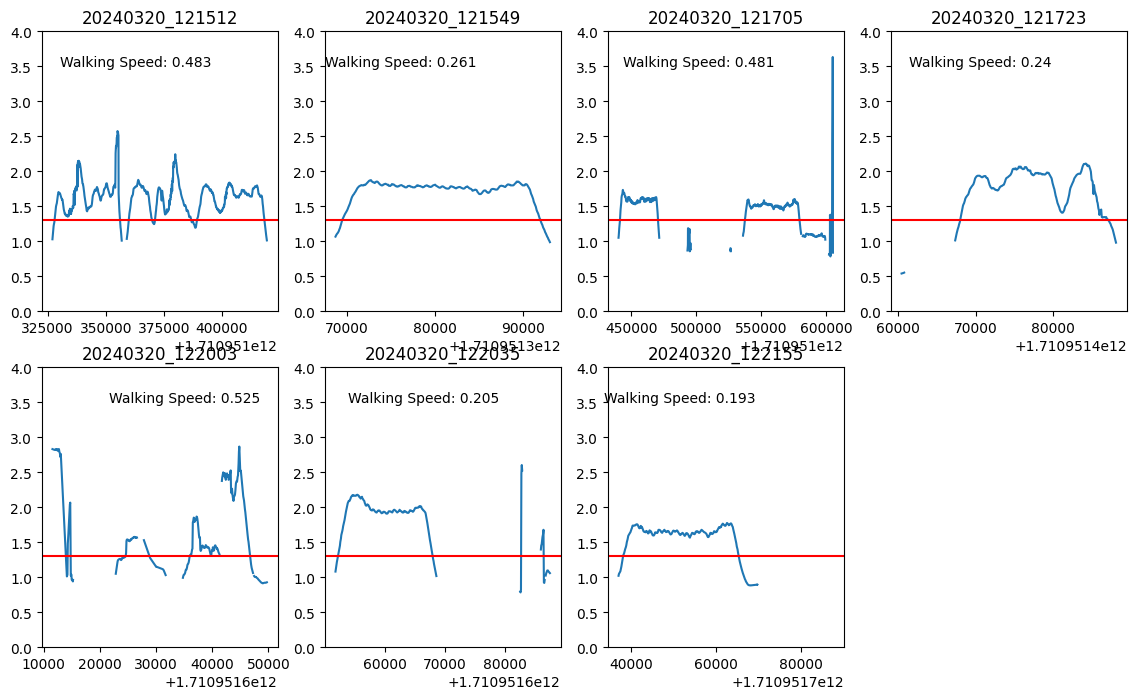

In [53]:

plt.figure(figsize=(14,8))

for i, d in enumerate(batch_two): #np.append(speed_trials, batch_two)
    plt.subplot(2, 4, i+1)
    df = filt_df[filt_df['date']==d]
    plt.plot(df['t'], df['c'])
    plt.axhline(y=0.8+0.5, color='red')
    plt.text(np.min(df['t']+10000), 3.5, f"Walking Speed: {np.round(np.array(meta_df['v'][meta_df['filename']==d].dropna())[0], 3)}")
    plt.ylim([0, 4])
    plt.title(d)
    #plt.show()

### 3. Aggregation Plots

In [54]:
# Define set

agg_set = [
    '20240320_121017',
    '20240320_121019',
    '20240320_121144',
    '20240320_121302',
    '20240320_121309',
    #'20240320_121321',
    '20240320_121512',
    '20240320_121549',
    #'20240320_121512',
    #'20240320_121549',
    #'20240320_121705',
    '20240320_121723',
    #'20240320_122003',
    '20240320_122035',
    '20240320_122155'
]

print(len(agg_set))

10


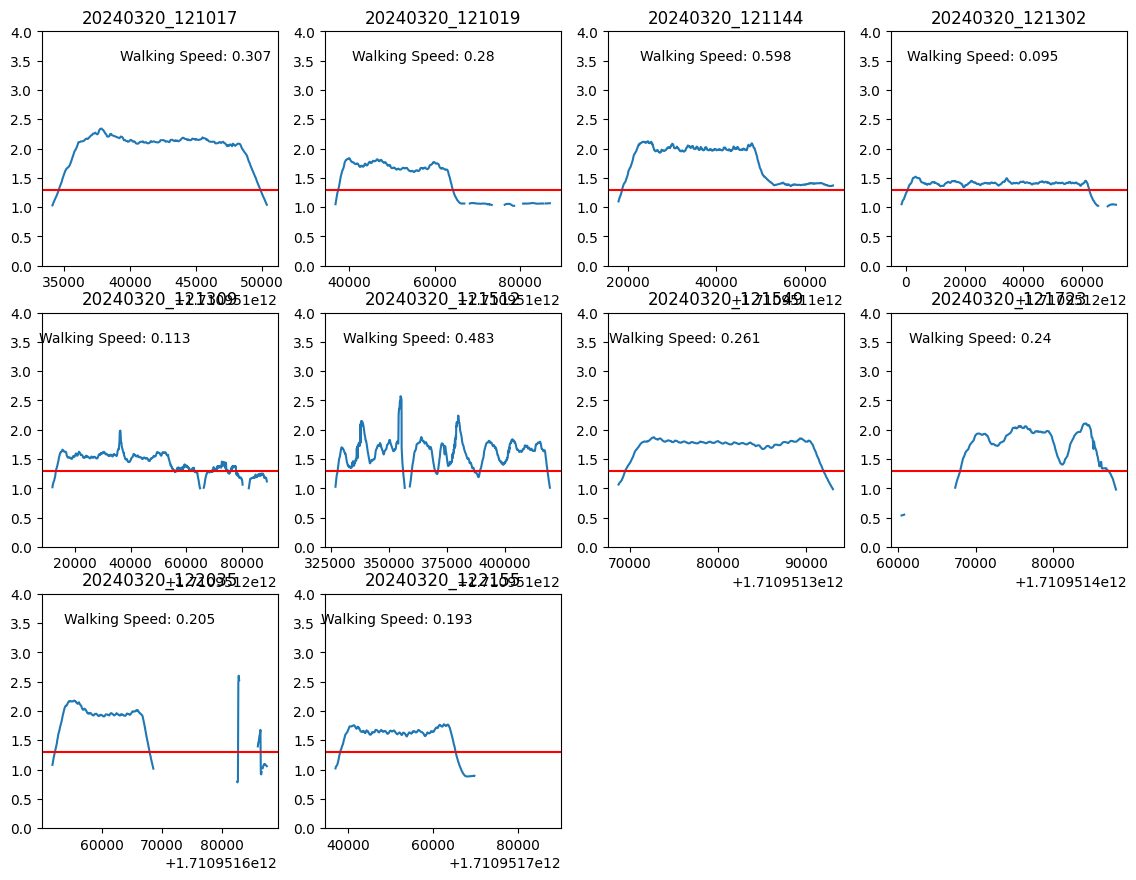

In [55]:
# Plot set before preprocessing

plt.figure(figsize=(14,14))

for i, d in enumerate(agg_set):
    plt.subplot(4, 4, i+1)
    df = filt_df[filt_df['date']==d]
    plt.plot(df['t'], df['c'])
    plt.axhline(y=0.8+0.5, color='red')
    plt.text(np.min(df['t']+10000), 3.5, f"Walking Speed: {np.round(np.array(meta_df['v'][meta_df['filename']==d].dropna())[0], 3)}")
    plt.ylim([0, 4])
    plt.title(d)
    #plt.show()

In [56]:
# Create df

agg_df = logs_df.copy()
agg_df = agg_df[agg_df.date.isin(agg_set)]
agg_df = agg_df.dropna(subset=('c'))

# Manual chopping
agg_df = agg_df[~((agg_df['date']=='20240320_121019') & (agg_df['t'] > (1.710951e12 + 66000)))]
agg_df = agg_df[~((agg_df['date']=='20240320_121144') & (agg_df['t'] < (1.710951e12 + 118000)))]
agg_df = agg_df[~((agg_df['date']=='20240320_121144') & (agg_df['t'] > (1.710951e12 + 154000)))]
agg_df = agg_df[~((agg_df['date']=='20240320_122035') & (agg_df['t'] > (1.7109516e12 + 69000)))]
agg_df = agg_df[~((agg_df['date']=='20240320_122155') & (agg_df['t'] > (1.7109516e12 + 170000)))]
agg_df = agg_df[~((agg_df['date']=='20240320_121723') & (agg_df['t'] < (1.7109514e12 + 67000)))]

In [22]:
'''
# Tool to inspect and find chop values
d = agg_set[10]

df = agg_df[agg_df['date']==d]
plt.plot(df['t'], df['c'])
plt.axhline(y=0.8+0.5, color='red')
plt.axvline(x=(1.7109514e12 + 67000))
plt.text(np.min(df['t']+10000), 3.5, f"Walking Speed: {np.round(np.array(meta_df['v'][meta_df['filename']==d].dropna())[0], 3)}")
plt.ylim([0, 4])
plt.title(d)
'''

'\n# Tool to inspect and find chop values\nd = agg_set[10]\n\ndf = agg_df[agg_df[\'date\']==d]\nplt.plot(df[\'t\'], df[\'c\'])\nplt.axhline(y=0.8+0.5, color=\'red\')\nplt.axvline(x=(1.7109514e12 + 67000))\nplt.text(np.min(df[\'t\']+10000), 3.5, f"Walking Speed: {np.round(np.array(meta_df[\'v\'][meta_df[\'filename\']==d].dropna())[0], 3)}")\nplt.ylim([0, 4])\nplt.title(d)\n'

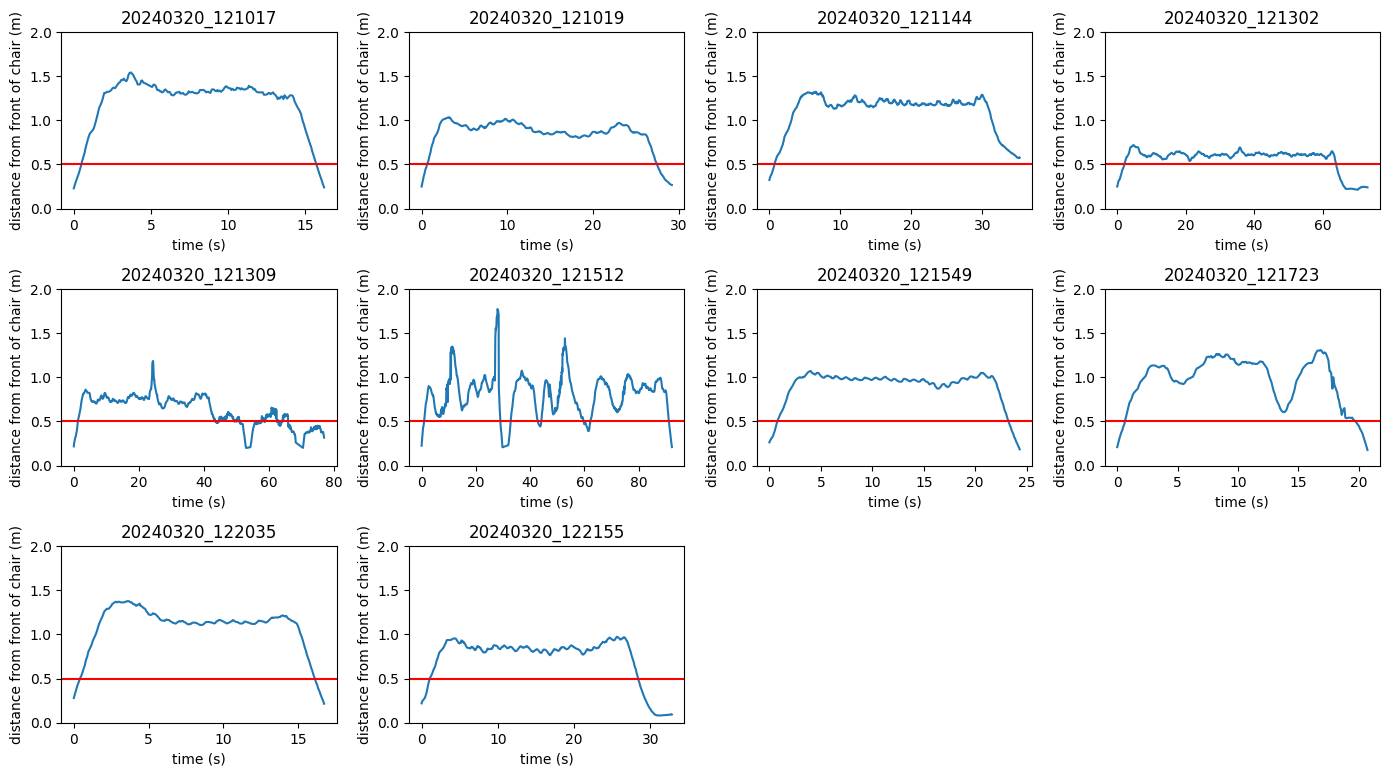

In [57]:
# Plot all after preprocessing

plt.figure(figsize=(14,10))

for i, d in enumerate(agg_set):
    plt.subplot(4, 4, i+1)
    df = agg_df[agg_df['date']==d]
    time_series = (np.array(df['t']) - np.min(df['t'])) / 1000
    dist_series = np.array(df['c']) - 0.8

    plt.plot(time_series, dist_series)
    plt.axhline(y=0.5, color='red')
    #plt.text(np.min(time_series)+50, 3.5, f"{np.round(np.array(meta_df['v'][meta_df['filename']==d].dropna())[0], 3)} m/s")
    plt.ylim([0, 2])
    plt.ylabel('distance from front of chair (m)')
    plt.xlabel('time (s)')
    plt.title(d)

plt.tight_layout()


In [58]:
# Summarize time series as rmse and std

from sklearn.metrics import r2_score, mean_squared_error

agg_df['target'] = 0.5

def std_rmse(g):
    
    sd = np.std(np.abs(g['target'] - (np.array(g['c']) - 0.8)))
    #rmse = np.sqrt(mean_squared_error(g['target'], g['c']))
    rmse = np.mean(np.abs(g['target'] - (np.array(g['c']) - 0.8)))
    return pd.Series(dict(sd=sd, rmse=rmse))

results = agg_df.groupby('date').apply(std_rmse).reset_index()

In [60]:
# Merge in walking velocities

proc_meta = meta_df[meta_df.filename.isin(agg_set)]
proc_meta = proc_meta[['filename', 'v']].drop_duplicates().dropna(subset=('v'))
full_results = pd.merge(results, proc_meta, how='left', left_on='date', right_on='filename').reset_index(drop=True)

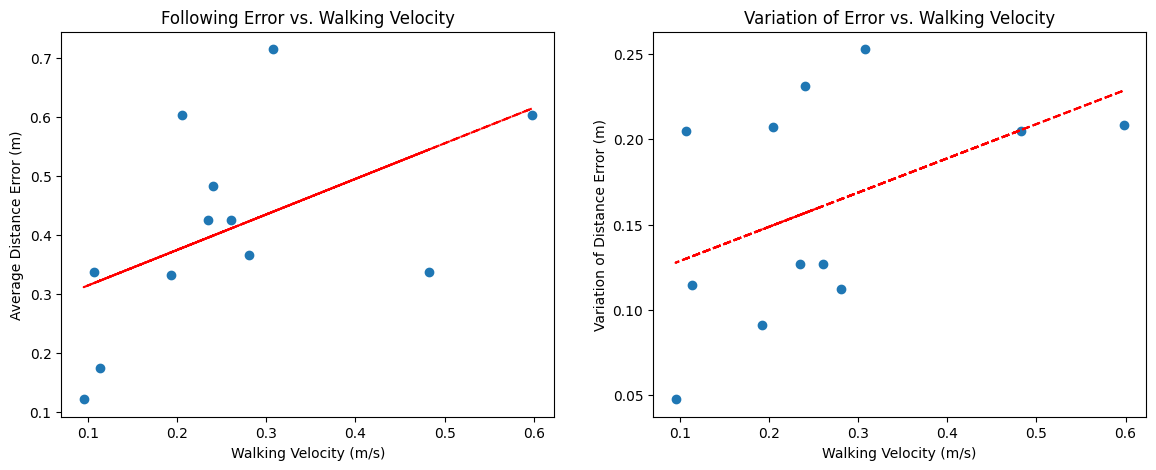

In [61]:
plt.figure(figsize=(14,5))

plt.subplot(1, 2, 1)

plt.scatter(full_results['v'], full_results['rmse'])
plt.xlabel('Walking Velocity (m/s)')
plt.ylabel('Average Distance Error (m)')
plt.title('Following Error vs. Walking Velocity')

z = np.polyfit(full_results['v'], full_results['rmse'], 1)
p = np.poly1d(z)
plt.plot(full_results['v'], p(full_results['v']), color='red', linestyle='--')


plt.subplot(1, 2, 2)

plt.scatter(full_results['v'], full_results['sd'])
plt.xlabel('Walking Velocity (m/s)')
plt.ylabel('Variation of Distance Error (m)')
plt.title('Variation of Error vs. Walking Velocity')

z = np.polyfit(full_results['v'], full_results['sd'], 1)
p = np.poly1d(z)
plt.plot(full_results['v'], p(full_results['v']), color='red', linestyle='--')

<AxesSubplot: xlabel='v', ylabel='rmse'>

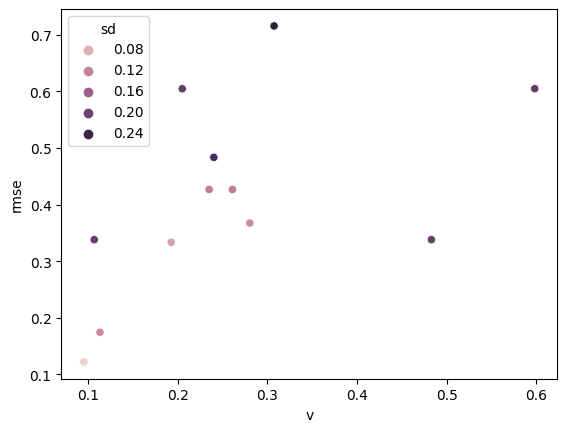

In [62]:
import seaborn as sns
sns.scatterplot(x="v", y="rmse",
                hue="sd", data=full_results)

Tag on angle research


In [63]:
agg_df

,t,a,b,c,d,e,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,date,target
2072,1.710951e+12,1.0,0.0,1.029,5.775000,17.796738,[127,0.0,436,479],127,479,NaN,NaN,NaN,NaN,20240320_121017,0.5
2073,1.710951e+12,1.0,0.0,1.088,6.825000,14.496208,[139,0.0,431,479],139,479,NaN,NaN,NaN,NaN,20240320_121017,0.5
2074,1.710951e+12,1.0,0.0,1.120,6.628125,13.783120,[137,0.0,432,479],137,479,NaN,NaN,NaN,NaN,20240320_121017,0.5
2075,1.710951e+12,1.0,0.0,1.153,7.218750,13.607626,[144,0.0,429,479],144,479,NaN,NaN,NaN,NaN,20240320_121017,0.5
2076,1.710951e+12,1.0,0.0,1.204,6.956250,13.143718,[142,0.0,427,479],142,479,NaN,NaN,NaN,NaN,20240320_121017,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16158,1.710952e+12,0.0,0.0,0.890,32.287500,11.482397,[331,0.0,631,479],331,479,NaN,NaN,NaN,NaN,20240320_122155,0.5
16159,1.710952e+12,0.0,0.0,0.891,32.681250,11.911852,[336,0.0,629,479],336,479,NaN,NaN,NaN,NaN,20240320_122155,0.5
16160,1.710952e+12,0.0,0.0,0.894,32.353125,12.152616,[332,0.0,630,479],332,479,NaN,NaN,NaN,NaN,20240320_122155,0.5
16161,1.710952e+12,0.0,0.0,0.897,32.156250,12.395600,[330,0.0,631,479],330,479,NaN,NaN,NaN,NaN,20240320_122155,0.5


In [64]:
agg_df
agg_df['d'] = pd.to_numeric(agg_df['d'], errors='coerce')
agg_df['e'] = pd.to_numeric(agg_df['e'], errors='coerce')

In [65]:
agg_df['x'] = (agg_df.b5.astype(int) + agg_df.b3.astype(int))//2
agg_df['y'] = (agg_df.b2.astype(int) + agg_df.b6.astype(int))//2

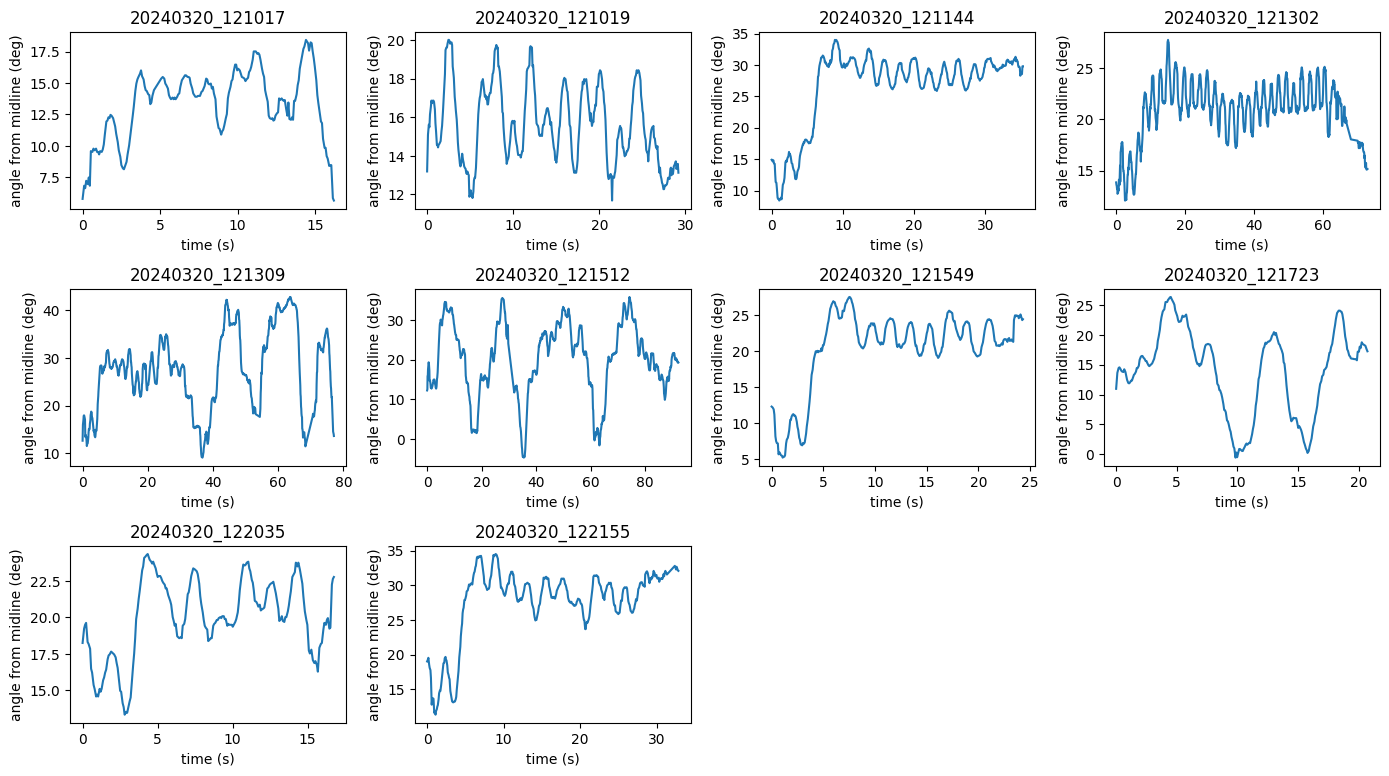

In [66]:
# Plot all after preprocessing

plt.figure(figsize=(14,10))

for i, d in enumerate(agg_set):
    plt.subplot(4, 4, i+1)
    df = agg_df[agg_df['date']==d]
    time_series = (np.array(df['t']) - np.min(df['t'])) / 1000
    dist_series = np.array(df['d'])

    plt.plot(time_series, dist_series)
    #plt.axhline(y=0.5, color='red')
    #plt.text(np.min(time_series)+50, 3.5, f"{np.round(np.array(meta_df['v'][meta_df['filename']==d].dropna())[0], 3)} m/s")
    #plt.ylim([-30, 30])
    plt.ylabel('angle from midline (deg)')
    plt.xlabel('time (s)')
    plt.title(d)

plt.tight_layout()


In [67]:
# Summarize maximum angle

def max_a(g):
    
    m = np.max(np.abs(g['d']))
    fps = np.mean(np.abs(g['e']))

    return pd.Series(dict(max_ang=m, avg_fps=fps))

results = agg_df.groupby('date').apply(max_a).reset_index()

In [68]:
results

,date,max_ang,avg_fps
0,20240320_121017,18.440625,13.224811
1,20240320_121019,20.015625,13.133001
2,20240320_121144,33.993750,13.198323
3,20240320_121302,27.759375,12.822042
4,20240320_121309,42.787500,13.057197
5,20240320_121512,35.765625,12.691984
6,20240320_121549,27.562500,13.003825
7,20240320_121723,26.381250,12.711143
8,20240320_122035,24.346875,12.785437
9,20240320_122155,34.518750,12.991690
